In [1]:
#install and import packages
!pip install --upgrade scikit-learn
!pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sklearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 44.6 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [2]:
#read and display data
data = pd.read_csv("/content/winequality-red.csv", sep = ";")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
#split into features/target
x = data.drop(columns = ['quality'])
#attemptd normalization at one point but this step yielded lower performance
#x_norm = sklearn.preprocessing.normalize(x, axis=0)
y = data['quality']

In [4]:
def return_metrics(y_test, y_pred):
  from sklearn import metrics
  print("Accuracy: %.2f" % metrics.accuracy_score(y_test, y_pred))
  print(metrics.balanced_accuracy_score(y_test, y_pred))
  print(metrics.classification_report(y_test, y_pred))
  print(metrics.confusion_matrix(y_test, y_pred))

In [ ]:
'''from sklearn import linear_model, ensemble
models = [linear_model.RidgeClassifier(), ensemble.AdaBoostClassifier(), ensemble.BaggingClassifier(), ensemble.RandomForestClassifier(), linear_model.LogisticRegression(), linear_model.Perceptron(), linear_model.SGDClassifier()]
model_names = ["Ridge Classifier", "AdaBoost Classifier", "Bagging Classifier", "RandomForest Classifier", "Logistic Regression Classifier", "Perceptron Classifier", "SGD Classifier"]
for model in models:
  #split into training and test sets
  for i in range(0, 10):
    from sklearn import model_selection
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
      x, y, test_size=0.2, random_state=42)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    return_metrics(y_test, y_pred)
'''

In [25]:
from sklearn import linear_model, ensemble
from sklearn.model_selection import cross_val_score
from sklearn import model_selection
models = [linear_model.RidgeClassifier(), ensemble.AdaBoostClassifier(), ensemble.BaggingClassifier(), ensemble.RandomForestClassifier(), linear_model.LogisticRegression(), linear_model.Perceptron(), linear_model.SGDClassifier()]
model_names = ["Ridge Classifier", "AdaBoost Classifier", "Bagging Classifier", "RandomForest Classifier", "Logistic Regression Classifier", "Perceptron Classifier", "SGD Classifier"]
max_score = 0
max_index = 0
import numpy

for i in range(len(models)):
  model_score = []
  for j in range(0, 5):
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(
      x, y, test_size=0.2, random_state=42)
    m = models[i]
    scores = sklearn.model_selection.cross_validate(m, x_train, y_train, cv=10, scoring = "balanced_accuracy", return_estimator=True)
    best = list(scores["test_score"]).index(max(scores["test_score"]))
    best_model = scores["estimator"][best]
    y_pred = best_model.predict(x_test)

    #print(scores)
    model_score.append(sklearn.metrics.balanced_accuracy_score(y_test, y_pred))
    #print(model_score)
  if numpy.array(model_score).mean() > max_score:
    max_score = numpy.array(model_score).mean()
    max_index = i
  #print(model_names[i], numpy.array(model_score).mean())
print(max_score, model_names[max_index])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

0.31964479964479964 RandomForest Classifier


NameError: ignored

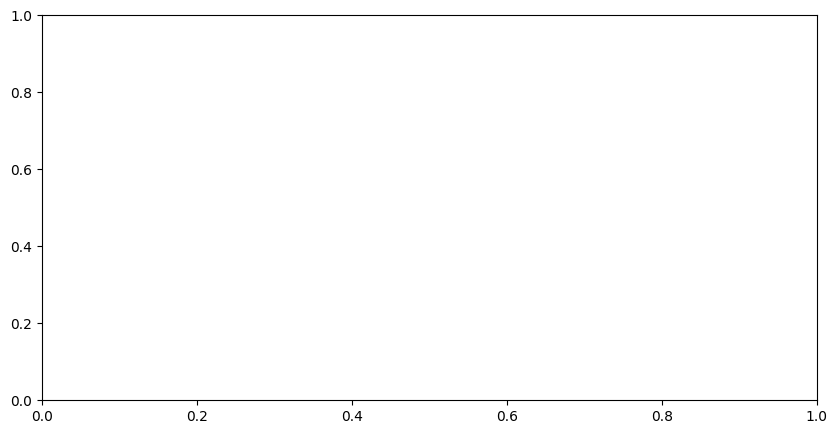

In [6]:
#plot confusion matrix to visualize true/false positives/negatives among classes
fig, ax = plt.subplots(figsize=(10, 5))
sklearn.metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_cls, ax=ax)